### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [87]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [88]:
data = pd.read_csv('data/coupons.csv')
data.shape


(12684, 26)

In [89]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [ ]:
# Examine how many missing values exist for each column and also list the unique values in each column
for col in data.columns:
    missing_count = data[col].isnull().sum()
    unique_values = data[col].unique()
    #print(f"{col}: {missing_count} missing values")
    #print(f"Unique values: {unique_values}\n")

3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# Let's drop the car column as it is predominantly missing values and therefore not useful for our analysis

data = data.drop('car', axis=1)
#print(data.shape)

# For the rest of the columns with relatively small number of missing values, let's fill them with the mode value
for col in data.columns:
    if data[col].isnull().sum() > 0:
        mode_value = data[col].mode()[0] # since there could be multiple mode values, we will take the first one
        #print(mode_value)
        data[col] = data[col].fillna(mode_value)


4. What proportion of the total observations chose to accept the coupon?



In [103]:
coupon_accepted_count = (data['Y'] == 1).sum()
total_count = len(data)
coupon_accepted_rate = coupon_accepted_count / total_count
print(f"overall coupon acceptance rate is {coupon_accepted_rate: 0.2%}")

overall coupon acceptance rate is  56.84%


5. Use a bar plot to visualize the `coupon` column.

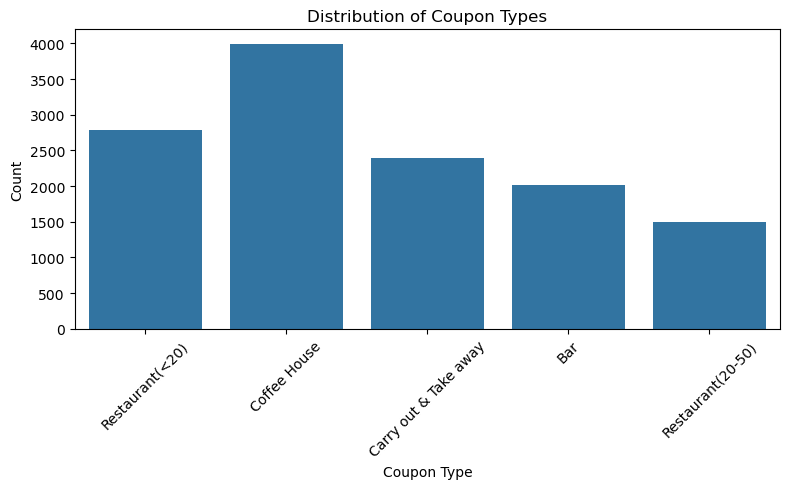

In [93]:
plt.figure(figsize=(8, 5))
sns.countplot(x='coupon', data=data)
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

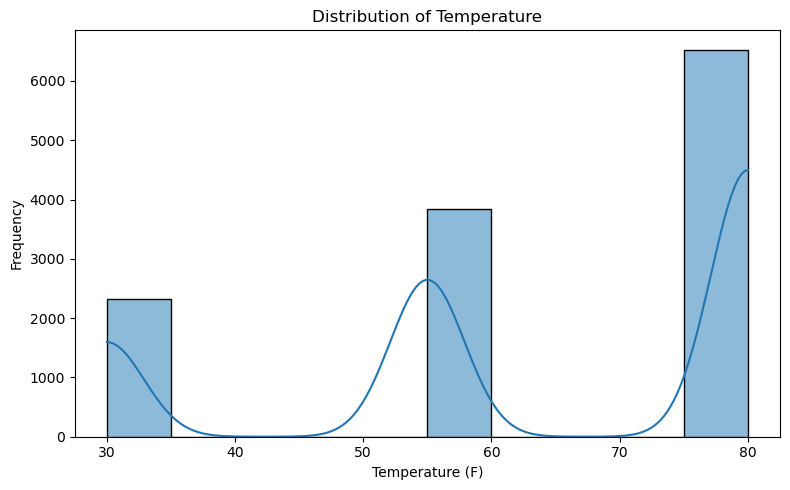

In [94]:
plt.figure(figsize=(8, 5))
sns.histplot(data['temperature'], bins=10, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [95]:
bar_coupons = data[data['coupon'] == 'Bar']
#bar_coupons.shape
#bar_coupons.head()

2. What proportion of bar coupons were accepted?


In [104]:
bar_accepted = (bar_coupons['Y'] == 1).sum()
bar_total = bar_coupons.shape[0]
bar_acceptance_rate = bar_accepted / bar_total
print(f"Overall bar coupons acceptance rate is: {bar_acceptance_rate:.2%}")

Overall bar coupons acceptance rate is: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [105]:
# Acceptance rate for those who went to a bar 3 or fewer times a month
occasional_bar_visitors = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]
occasional_bar_acceptance_rate = (occasional_bar_visitors['Y'] == 1).sum()/occasional_bar_visitors.shape[0]

# Acceptance rate for those who went to a bar 4 or more times a month
frequent_bar_visitors = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]
frequent_bar_acceptance_rate = (frequent_bar_visitors['Y'] == 1).sum()/frequent_bar_visitors.shape[0]  

print(f"Bar coupon acceptance rate (3 or fewer bar visits): {occasional_bar_acceptance_rate:.2%}")
print(f"Bar coupon acceptance rate (4 or more bar visits): {frequent_bar_acceptance_rate:.2%}")

Bar coupon acceptance rate (3 or fewer bar visits): 37.07%
Bar coupon acceptance rate (4 or more bar visits): 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [106]:
# Acceptance rate for drivers who go to the bar more than once a month and are over age 25
over_25_bar_visitors = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['age'].isin(['26', '31', '36', '41', '46', '50plus']))
]

over_25_acceptance_rate = (over_25_bar_visitors['Y'] == 1).mean()

# Acceptance rate for all other drivers that dont meet the criteria above
others = bar_coupons[
    ~((bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
      (bar_coupons['age'].isin(['26', '31', '36', '41', '46', '50plus'])))
]

others_acceptance_rate = (others['Y'] == 1).mean()

print(f"Bar coupon acceptance rate (bar >1/month & age >25): {over_25_acceptance_rate:.2%}")
print(f"Bar coupon acceptance rate (all others): {others_acceptance_rate:.2%}")

Bar coupon acceptance rate (bar >1/month & age >25): 69.52%
Bar coupon acceptance rate (all others): 33.50%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [107]:
# Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid,
no_kids_bar_visitors = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['passanger'] != 'Kid(s)') 
]

no_kids_acceptance_rate = (no_kids_bar_visitors['Y'] == 1).mean()
print(f"Bar coupon acceptance rate (bar >1/month, not kid passenger): {no_kids_acceptance_rate:.2%}")

# Acceptance rate for drivers who go to bars more than once a month and had occupations other than farming, fishing, or forestry
no_farming_fishing_forestry_bar_visitors = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry']))
]

no_farming_fishing_forestry_acceptance_rate = (no_farming_fishing_forestry_bar_visitors['Y'] == 1).mean()
print(f"Bar coupon acceptance rate (bar >1/month, not farming/fishing/forestry): {no_farming_fishing_forestry_acceptance_rate:.2%}")

Bar coupon acceptance rate (bar >1/month, not kid passenger): 71.32%
Bar coupon acceptance rate (bar >1/month, not farming/fishing/forestry): 68.79%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [108]:
#Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid, annd were not widowed
no_kids_not_widowed_bar_visitors = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (bar_coupons['maritalStatus'] != 'Widowed')
]

no_kids_not_widowed_acceptance_rate = (no_kids_not_widowed_bar_visitors['Y'] == 1).mean()
print(f"Bar coupon acceptance rate (bar >1/month, not kid passenger, not widowed): {no_kids_not_widowed_acceptance_rate:.2%}")

under_30_bar_visitors = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['age'].isin(['below21', '21', '26']))
]
under_30_acceptance_rate = (under_30_bar_visitors['Y'] == 1).mean()
print(f"Bar coupon acceptance rate (bar >1/month & age <30): {under_30_acceptance_rate:.2%}")

cheap_restaurant_drivers = data[
    (data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (data['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
]
cheap_restaurant_acceptance_rate = (cheap_restaurant_drivers['Y'] == 1).mean()
print(f"Bar coupon acceptance rate (cheap restaurants >4/month & income <50K): {cheap_restaurant_acceptance_rate:.2%}")


Bar coupon acceptance rate (bar >1/month, not kid passenger, not widowed): 71.32%
Bar coupon acceptance rate (bar >1/month & age <30): 72.17%
Bar coupon acceptance rate (cheap restaurants >4/month & income <50K): 60.07%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Key findings and conclusion: 

On an average, 41% of bar coupons get accepted
Drivers that visit bars more frequently (>= 4 times per month) are almost twice as likely to accept bar coupons (approx 77% acceptance) than those who visit less often

Drivers over age of 25 that visit bars at least once a month are two times likely to accept bar coupons (approx 70%) Vs rest of the drivers

Within the drivers that visit bars at least once a month, bar coupon acceptance rate stays at approx. 70% regardless of the age

Within the drivers that visit bars at least once a month, bar coupon acceptance rate stays at approx. 70% when they don't have kid passengers

Drivers that frequently ( >=4 times a month) visit cheap restaurants and have lower income (<$50K) are more likely (1.5 times) to accept bar coupons than average population.

Bar coupons are highly effective for drivers who visit bar at least once a month and also quite effective for lower income (<$50K) drivers that frequently eat at cheap restaurants.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Let's analyze carry out & takeaway coupon acceptance: 
1. Calculate the overall coupon acceptance rate for the entire population
2. Compare the acceptance rate for 2 hr with 1 day coupon
3. Compare the acceptance rate when the weather is good or bad
4. How does the accpetance rate vary based on the time of the day
5. What is the acceptance rate for drivers that visit expensive restaurants 4 or more times a month
6. What is the acceptance rate for drivers that are driving in the direction opposite to the coupon giving place.
7. What is the acceptance rate for the drivers with income greater than $100,000
8. What is the acceptance rate for drivers who have children as passengers

Overall 'Carry out & Take away' coupons acceptance rate: 73.55%
'Carry out & Take away' coupons acceptance rate (2 hr coupons): 66.38%
'Carry out & Take away' coupons acceptance rate (1 day coupons): 78.16%
'Carry out & Take away' coupons acceptance rate (good weather): 76.29%
'Carry out & Take away' coupons acceptance rate (bad weather): 61.13%


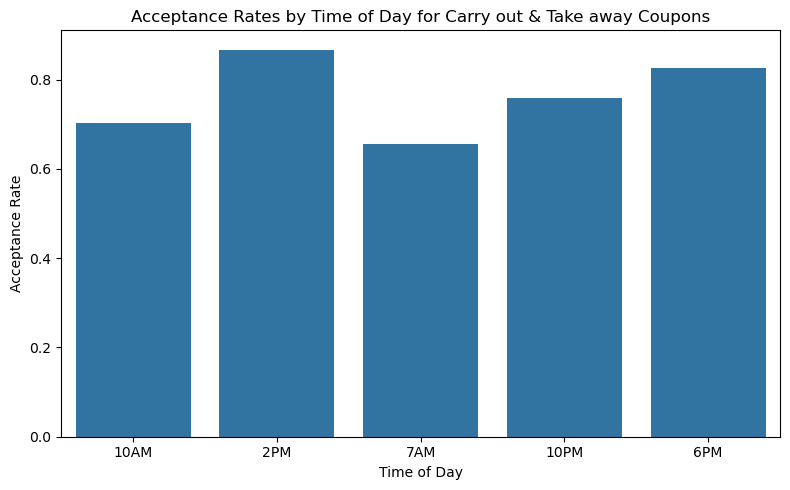

'Carry out & Take away' coupons acceptance rate (expensive restaurants >4/month): 73.60%
'Carry out & Take away' coupons acceptance rate (opposite direction): 75.12%
'Carry out & Take away' coupons acceptance rate (income >$100,000): 70.59%
'Carry out & Take away' coupons acceptance rate (kid passengers): 70.39%


In [109]:
# Create a new DataFrame that only contains "Carry out & Take away" coupons
carryout_coupons = data[data['coupon'] == 'Carry out & Take away']
#carryout_coupons.shape
#carryout_coupons.head()

# Calculate and print the overall acceptance rate of "Carry out & Take away" coupons
carryout_accepted = (carryout_coupons['Y'] == 1).sum()
carryout_total = carryout_coupons.shape[0]
carryout_acceptance_rate = carryout_accepted / carryout_total
print(f"Overall 'Carry out & Take away' coupons acceptance rate: {carryout_acceptance_rate:.2%}")

# Compare acceptance rates based on whether it is a 2 hr coupon or 1 day coupon
two_hr_coupons = carryout_coupons[carryout_coupons['expiration'] == '2h']
one_day_coupons = carryout_coupons[carryout_coupons['expiration'] == '1d']
two_hr_acceptance_rate = (two_hr_coupons['Y'] == 1).mean()
one_day_acceptance_rate = (one_day_coupons['Y'] == 1).mean()
print(f"'Carry out & Take away' coupons acceptance rate (2 hr coupons): {two_hr_acceptance_rate:.2%}")
print(f"'Carry out & Take away' coupons acceptance rate (1 day coupons): {one_day_acceptance_rate:.2%}")

# Compare acceptance rates based on weather conditions
good_weather_coupons = carryout_coupons[carryout_coupons['weather'].isin(['Sunny', 'Cloudy'])]
bad_weather_coupons = carryout_coupons[carryout_coupons['weather'] == 'Rainy']
good_weather_acceptance_rate = (good_weather_coupons['Y'] == 1).mean()
bad_weather_acceptance_rate = (bad_weather_coupons['Y'] == 1).mean()
print(f"'Carry out & Take away' coupons acceptance rate (good weather): {good_weather_acceptance_rate:.2%}")        
print(f"'Carry out & Take away' coupons acceptance rate (bad weather): {bad_weather_acceptance_rate:.2%}")

# create a bar plot of acceptance rates based on time of day
plt.figure(figsize=(8, 5))
sns.barplot(x='time', y='Y', data=carryout_coupons, errorbar=None)
plt.title('Acceptance Rates by Time of Day for Carry out & Take away Coupons')  
plt.xlabel('Time of Day')
plt.ylabel('Acceptance Rate')
plt.tight_layout()
plt.show()

# calculate acceptance rate for drivers that visit expensive restuarants 4 or more times a month
expensive_restaurant_drivers = carryout_coupons[
    (carryout_coupons['Restaurant20To50'].isin(['4~8', 'gt8']))
]
#print (expensive_restaurant_drivers.shape)
expensive_restaurant_acceptance_rate = (expensive_restaurant_drivers['Y'] == 1).mean()
print(f"'Carry out & Take away' coupons acceptance rate (expensive restaurants >4/month): {expensive_restaurant_acceptance_rate:.2%}")

# calculate acceptance rate for drivers that are driving in the opposite direction to the coupon location
opposite_direction_drivers = carryout_coupons[
    (carryout_coupons['direction_opp'] == 1)
]
#print (opposite_direction_drivers.shape)
opposite_direction_acceptance_rate = (opposite_direction_drivers['Y'] == 1).mean()
print(f"'Carry out & Take away' coupons acceptance rate (opposite direction): {opposite_direction_acceptance_rate:.2%}")

# calculate acceptance rate for the drivers with income greater than $100,000
high_income_drivers = carryout_coupons[
    (carryout_coupons['income'].isin(['$100000 or More']))
]   
high_income_acceptance_rate = (high_income_drivers['Y'] == 1).mean()
print(f"'Carry out & Take away' coupons acceptance rate (income >$100,000): {high_income_acceptance_rate:.2%}")

# calculate acceptance rate for drivers who have children as passengers
kids_passenger_drivers = carryout_coupons[
    (carryout_coupons['passanger'] == 'Kid(s)')
]   
kids_passenger_acceptance_rate = (kids_passenger_drivers['Y'] == 1).mean()
print(f"'Carry out & Take away' coupons acceptance rate (kid passengers): {kids_passenger_acceptance_rate:.2%}")




Key Findings and Conclusion:

Carry out & takeaway coupons are more popular (overall acceptance rate of 73.55%) than bar coupons

1 day carryout coupons are more effective  (78% acceptance) than the ones with 2 hour expiry, although 2 hr expiry coupons do get accepted at 66%

Bad weather does lower the coupon acceptance rate down to 61% and good weather boosts it (76%)

2 PM is the best time and 7 AM is the worst time for coupon acceptance

Coupon acceptance rate doesn't seem to significantly vary with the factors such as whether the driver is (a) going in the opposite direction, (b) a high income earner, (c) carrying kids in the car, and (d) eating frequenty (4 or more times a month) in expensive restaurants.